In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference
import onnxruntime as rt

data = pd.read_csv('../data/investigation_train_large_checked.csv')

y = data['checked']

X = data.drop(['checked', 'Ja', 'Nee'], axis=1)
X = X.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_path = "../Group 9/model_1.onnx"
session = rt.InferenceSession(model_path)


y_pred_onnx = session.run(None, {'X': X_test.values.astype(np.float32)})[0]
y_pred_onnx = np.rint(y_pred_onnx).astype(int)

accuracy = accuracy_score(y_test, y_pred_onnx)
precision = precision_score(y_test, y_pred_onnx, average='binary')
recall = recall_score(y_test, y_pred_onnx, average='binary')
f1 = f1_score(y_test, y_pred_onnx, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

X_test['persoon_geslacht_vrouw'] = data.loc[X_test.index, 'persoon_geslacht_vrouw']
X_test['persoon_leeftijd_bij_onderzoek'] = data.loc[X_test.index, 'persoon_leeftijd_bij_onderzoek']

sensitive_feature = 'persoon_geslacht_vrouw'

metric_frame = MetricFrame(
    metrics={'selection_rate': selection_rate, 'accuracy': accuracy_score},
    y_true=y_test,
    y_pred=y_pred_onnx,
    sensitive_features=X_test[sensitive_feature]
)

print("Fairness Metrics by Sensitive Feature:")
print(metric_frame.by_group)

equalized_odds = equalized_odds_difference(y_true=y_test, y_pred=y_pred_onnx, sensitive_features=X_test[sensitive_feature])
print(f"Equalized Odds Difference: {equalized_odds}")

X_test_noisy = X_test.copy()
noise = np.random.normal(0, 0.1, X_test_noisy.shape)
X_test_noisy += noise

y_pred_noisy = session.run(None, {'X': X_test_noisy.values.astype(np.float32)})[0]
y_pred_noisy = np.rint(y_pred_noisy).astype(int)

accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy with Noise: {accuracy_noisy}")



Accuracy: 0.8571538461538462
Precision: 0.8539944903581267
Recall: 0.07806597834298665
F1 Score: 0.1430549146285187
Fairness Metrics by Sensitive Feature:
                        selection_rate  accuracy
persoon_geslacht_vrouw                          
0                             0.016718  0.852013
1                             0.011058  0.862570
Equalized Odds Difference: 0.022226879486653875
Accuracy with Noise: 0.8571538461538462


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from fairlearn.metrics import MetricFrame, selection_rate, equalized_odds_difference
import onnxruntime as rt

data = pd.read_csv('../data/investigation_train_large_checked.csv')
y = data['checked']

X = data.drop(['checked', 'Ja', 'Nee'], axis=1)
X = X.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_path = "../Group 9/model_2.onnx"

session = rt.InferenceSession(model_path)

y_pred_onnx = session.run(None, {'X': X_test.values.astype(np.float32)})[0]

y_pred_onnx = np.rint(y_pred_onnx).astype(int)
accuracy = accuracy_score(y_test, y_pred_onnx)
precision = precision_score(y_test, y_pred_onnx, average='binary')
recall = recall_score(y_test, y_pred_onnx, average='binary')
f1 = f1_score(y_test, y_pred_onnx, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

X_test['persoon_geslacht_vrouw'] = data.loc[X_test.index, 'persoon_geslacht_vrouw']
X_test['persoon_leeftijd_bij_onderzoek'] = data.loc[X_test.index, 'persoon_leeftijd_bij_onderzoek']

sensitive_feature = 'persoon_geslacht_vrouw'

metric_frame = MetricFrame(
    metrics={'selection_rate': selection_rate, 'accuracy': accuracy_score},
    y_true=y_test,
    y_pred=y_pred_onnx,
    sensitive_features=X_test[sensitive_feature]
)

print("Fairness Metrics by Sensitive Feature:")
print(metric_frame.by_group)

equalized_odds = equalized_odds_difference(y_true=y_test, y_pred=y_pred_onnx, sensitive_features=X_test[sensitive_feature])
print(f"Equalized Odds Difference: {equalized_odds}")

X_test_noisy = X_test.copy()
noise = np.random.normal(0, 0.1, X_test_noisy.shape)
X_test_noisy += noise

y_pred_noisy = session.run(None, {'X': X_test_noisy.values.astype(np.float32)})[0]
y_pred_noisy = np.rint(y_pred_noisy).astype(int)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy with Noise: {accuracy_noisy}")



Accuracy: 0.8231923076923077
Precision: 0.40794117647058825
Recall: 0.3492822966507177
F1 Score: 0.37633970967304303
Fairness Metrics by Sensitive Feature:
                        selection_rate  accuracy
persoon_geslacht_vrouw                          
0                             0.108329  0.833121
1                             0.154411  0.812732
Equalized Odds Difference: 0.07079364885110045
Accuracy with Noise: 0.8226538461538462


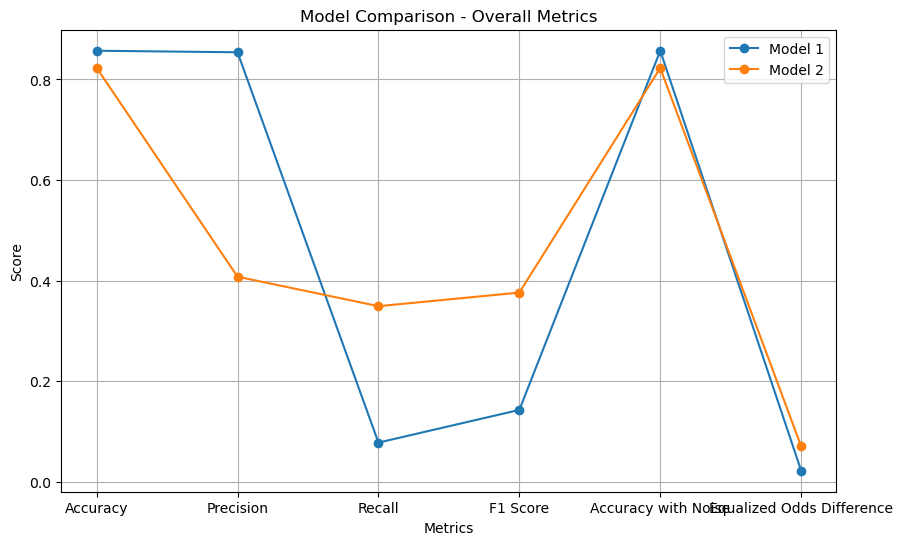

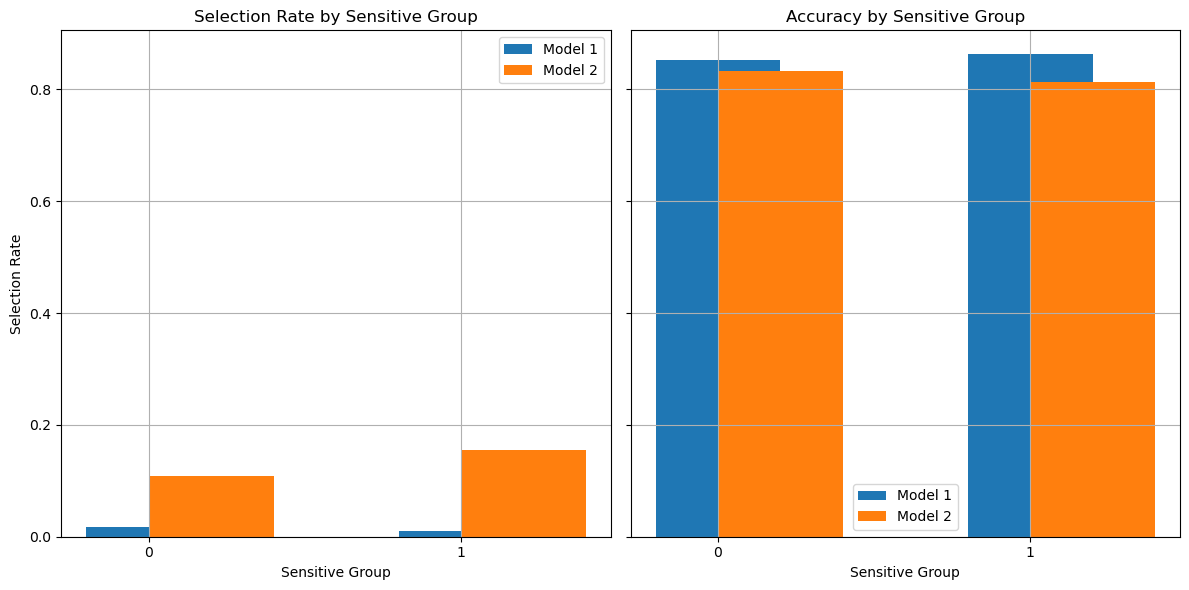

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for visualization
model_results = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Accuracy with Noise', 'Equalized Odds Difference'],
    'Model 1': [0.8571, 0.8540, 0.0781, 0.1431, 0.8571, 0.0222],
    'Model 2': [0.8232, 0.4079, 0.3493, 0.3763, 0.8227, 0.0708],
}

fairness_metrics = {
    'Sensitive Group': ['0', '1'],
    'Model 1 Selection Rate': [0.0167, 0.0111],
    'Model 1 Accuracy': [0.8520, 0.8626],
    'Model 2 Selection Rate': [0.1083, 0.1544],
    'Model 2 Accuracy': [0.8331, 0.8127],
}

# Convert to DataFrame
df_results = pd.DataFrame(model_results)
df_fairness = pd.DataFrame(fairness_metrics)

# Plot overall metrics comparison
plt.figure(figsize=(10, 6))
for model in ['Model 1', 'Model 2']:
    plt.plot(df_results['Metrics'], df_results[model], marker='o', label=model)

plt.title('Model Comparison - Overall Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Plot fairness metrics by sensitive feature
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Selection Rate
axes[0].bar(df_fairness['Sensitive Group'], df_fairness['Model 1 Selection Rate'], width=0.4, label='Model 1', align='center')
axes[0].bar(df_fairness['Sensitive Group'], df_fairness['Model 2 Selection Rate'], width=0.4, label='Model 2', align='edge')
axes[0].set_title('Selection Rate by Sensitive Group')
axes[0].set_xlabel('Sensitive Group')
axes[0].set_ylabel('Selection Rate')
axes[0].legend()
axes[0].grid(True)

# Accuracy
axes[1].bar(df_fairness['Sensitive Group'], df_fairness['Model 1 Accuracy'], width=0.4, label='Model 1', align='center')
axes[1].bar(df_fairness['Sensitive Group'], df_fairness['Model 2 Accuracy'], width=0.4, label='Model 2', align='edge')
axes[1].set_title('Accuracy by Sensitive Group')
axes[1].set_xlabel('Sensitive Group')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

